## About OLA

Ola Cabs offers mobility solutions by connecting customers to drivers and a wide range of vehicles across bikes, auto-rickshaws, metered taxis, and cabs, enabling convenience and transparency for hundreds of millions of consumers and over 1.5 million driver-partners. The primary concern for Ola is to ensure a quality driving experience for its users and retaining efficient drivers.

## Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.) Tenure information (joining date, Last Date) Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
ola = pd.read_csv("ola_driver_scaler.csv",index_col="Unnamed: 0")

In [4]:
ola.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## EXPOLATORY DATA ANALYSIS

In [5]:
print('Rows in the dataset: ',ola.shape[0])
print('Column in the dataset: ',ola.shape[1])

Rows in the dataset:  19104
Column in the dataset:  13


In [6]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [7]:
ola.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
ola.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [9]:
ola.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [10]:
ola.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

## DATA PROCESSING AND FEATURE ENGINEERING

In [11]:
ola1=ola.copy(deep=True)

In [12]:
ola1.head(3)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [13]:
# # Target variable creation: Create a column called target which tells whether the driver has left the company- 
# # driver whose last working day is present will have the value 1

first = (ola1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2584639437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2584639437.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first['Las

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [14]:
# Create a column which tells whether the quarterly rating has increased for that driver - 
# for those whose quarterly rating has increased we assign the value 1
QR1 =  (ola1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
QR2 = (ola1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [15]:
print(QR1.shape,QR2.shape)

(2381, 2) (2381, 2)


In [16]:
QR1.isna().sum(),QR2.isna().sum()

(Driver_ID           0
 Quarterly Rating    0
 dtype: int64,
 Driver_ID           0
 Quarterly Rating    0
 dtype: int64)

In [17]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')

first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [18]:
first['Promotion'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1


In [19]:
# Create a column which tells whether the monthly income has increased for that driver - 
# for those whose monthly income has increased we assign the value 1
incm1 =  (ola1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (ola1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [20]:
incm1.shape,incm2.shape

((2381, 2), (2381, 2))

In [21]:
incm1.isna().sum(),incm2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [22]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [23]:
first['Raise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [24]:
first.head(3)

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0


In [25]:
first.tail(3)

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
2378,2786,0,2,1,1,35370,35370,0
2379,2787,0,2,1,1,69498,69498,0
2380,2788,1,1,2,1,70254,70254,0


In [26]:
first = first[['Driver_ID','target','Raise','Promotion']]
first.head()

,Driver_ID,target,Raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


In [27]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
ola1 = ola1.groupby([ola1['Driver_ID']]).aggregate(functions)
ola1['month'] = pd.to_datetime(ola['Dateofjoining']).dt.month
ola1['year'] = pd.DatetimeIndex(ola1['Dateofjoining']).year
ola1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\4178244702.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ola1['month'] = pd.to_datetime(ola['Dateofjoining']).dt.month


In [28]:
ola1.reset_index(drop=True, inplace=True)
ola1 = ola1.merge(first,on='Driver_ID')
ola1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,12,2020,1,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,11,2019,0,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,12,2019,0,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,12,2020,1,0,1


In [29]:
import regex
ola1['Age'] = ola1['Age'].astype('int64')
ola1['Cities'] =ola1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [30]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int32  
 14  year                  2381 non-null   int32  
 15  target               

In [31]:
ola1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
ola1['Gender'].replace({'M':0,'F':1},inplace=True)
ola1['Gender'] = ola1['Gender'].astype('int64')

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1848637790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ola1['Gender'].replace({'M':0,'F':1},inplace=True)


In [32]:
ola1.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,12,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,1,0,1,11


In [33]:
ola1.isnull().sum().sum()

0

In [34]:
ola1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


## DATA VISUALIZATION

### Univariate

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3794103485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ola1.month,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3794103485.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ola1.year,palette='viridis')


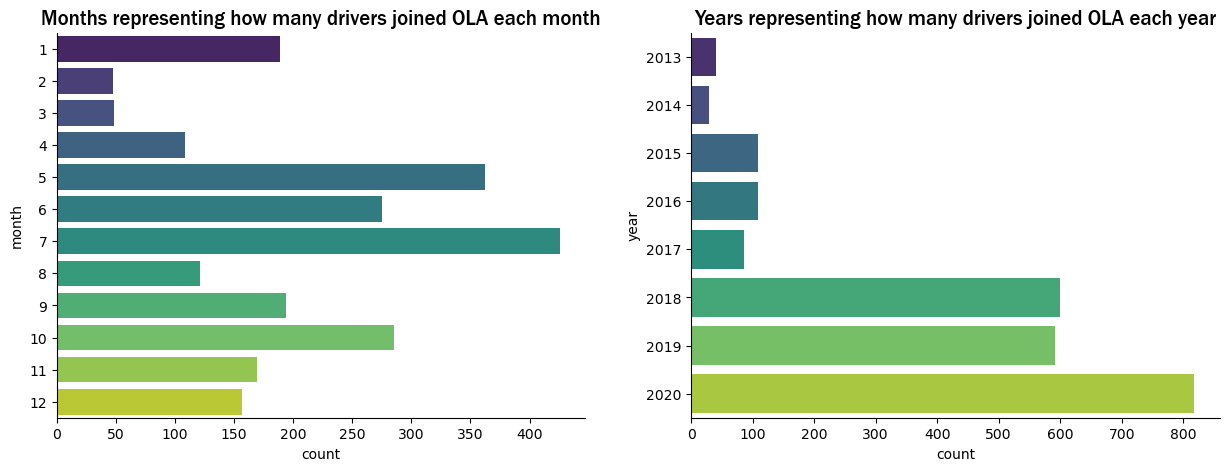

In [35]:
# figure1
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=ola1.month,palette='viridis')
plt.title('Months representing how many drivers joined OLA each month',fontname='Franklin Gothic Medium', fontsize=15)


ax = fig.add_subplot(1,2,2)
sns.countplot(y=ola1.year,palette='viridis')
plt.title('Years representing how many drivers joined OLA each year',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

    Observations:
    - July received the maximum number of drivers in 8 years.
    - February and March receives the least number of Drivers joining OLA.
    - Joining of Drivers receives a boost of about 500% after 2017.


C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3271683644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1.Age,palette='viridis',width=0.8)
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3271683644.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=a,palette='viridis')


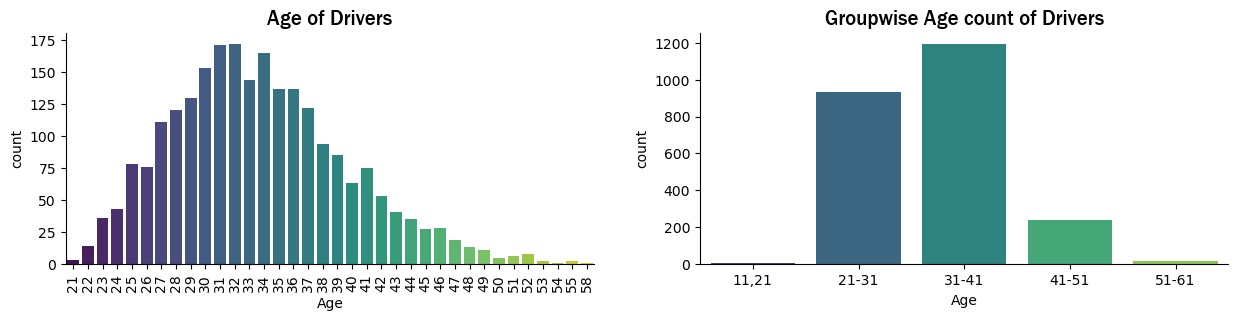

In [36]:
# figure2
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=ola1.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(ola1.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2325263759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1.Cities,palette='viridis',width=0.6)
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2325263759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1.Reportings,palette='viridis',width=0.6)


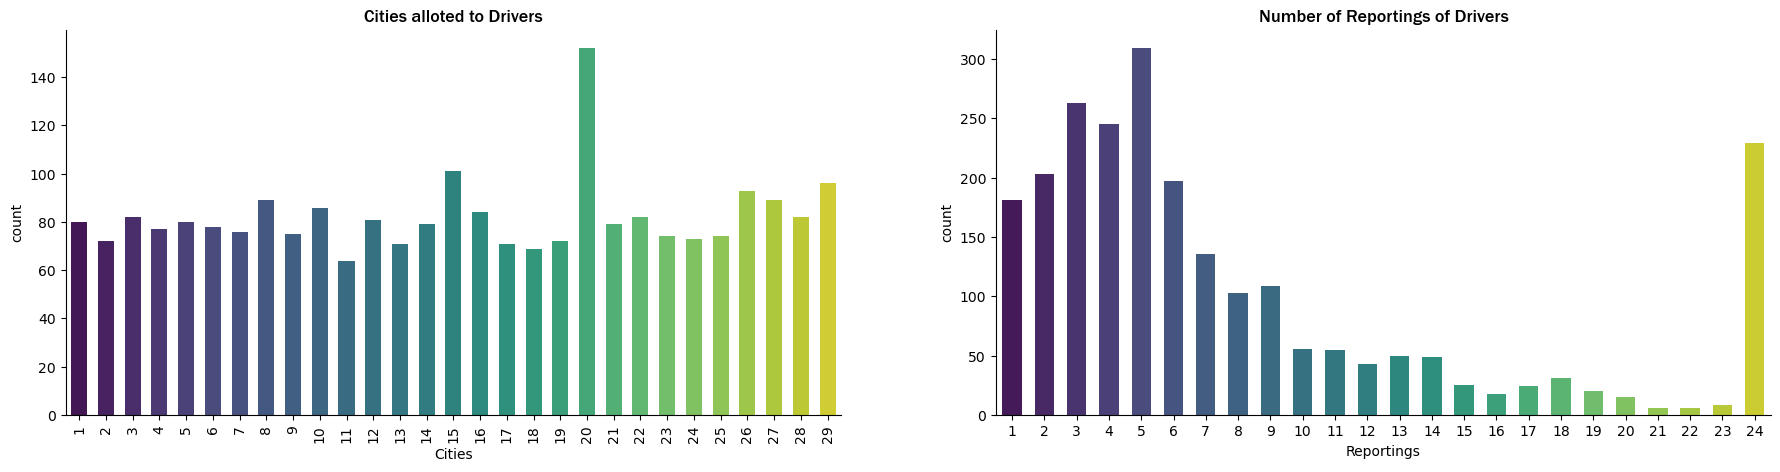

In [37]:
# figure3
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=ola1.Cities,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=ola1.Reportings,palette='viridis',width=0.6)
plt.title('Number of Reportings of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
          
# ax = fig.add_subplot(133)
# sns.countplot(x=ola1.Education_Level,palette='viridis')
# plt.title('Educational Level of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
sns.despine()
plt.show()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2363093602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1.Grade,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2363093602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1['Joining Designation'],palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2363093602.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ola1.Education_Level,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2363093602.py:13: FutureWarn

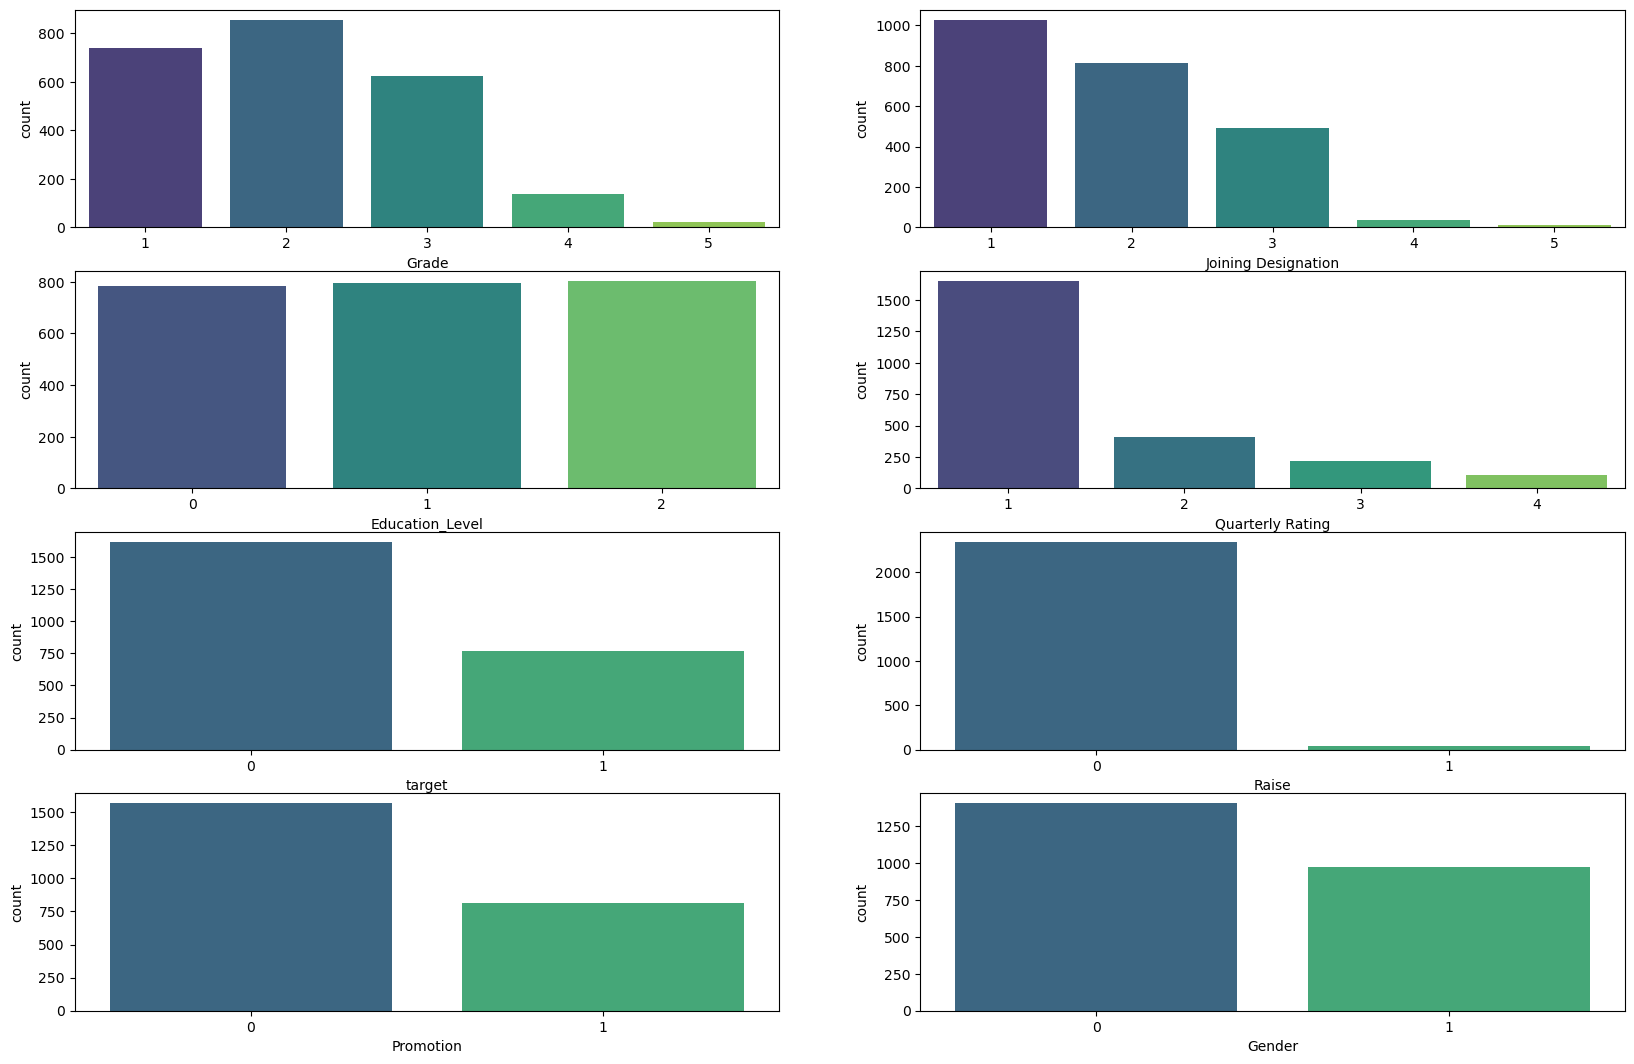

In [38]:
# figure4
plt.figure(figsize=(20,13))
plt.subplot(4,2,1)
sns.countplot(x=ola1.Grade,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,2)
sns.countplot(x=ola1['Joining Designation'],palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,3)
sns.countplot(x=ola1.Education_Level,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,4)
sns.countplot(x=ola1['Quarterly Rating'],palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,5)
sns.countplot(x=ola1.target,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,6)
sns.countplot(x=ola1.Raise,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,7)
sns.countplot(x=ola1.Promotion,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,8)
sns.countplot(x=ola1.Gender,palette='viridis')
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.show()

    Observations:
        - Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years o
            meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
        - 58.9% of the Drivers are male.
        - City C20 has been used by the most of the drivers.
        - There are 3 Education levels and all of them alomst have the equal distribution of Drivers.
        - Grade 2 has been received by most of the Drivers and then the count of grade keeps on falling.

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1849082890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='teal')


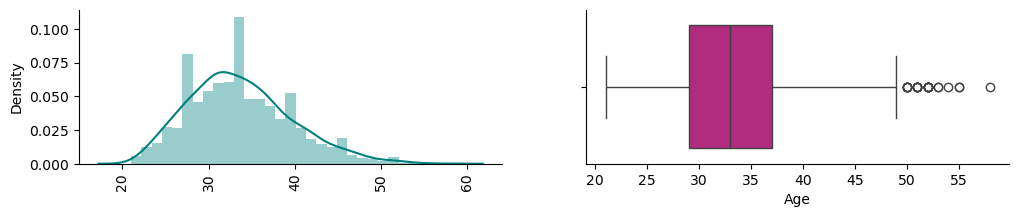

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1849082890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='teal')


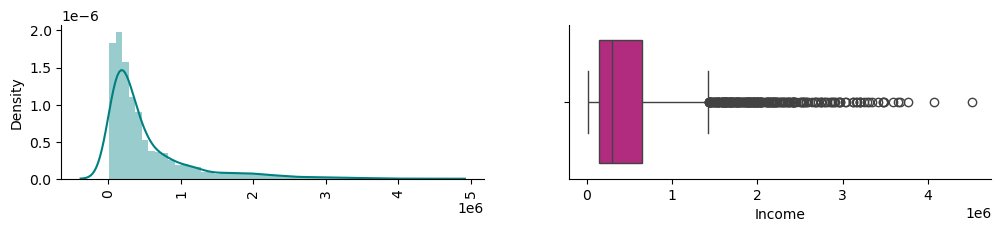

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1849082890.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='teal')


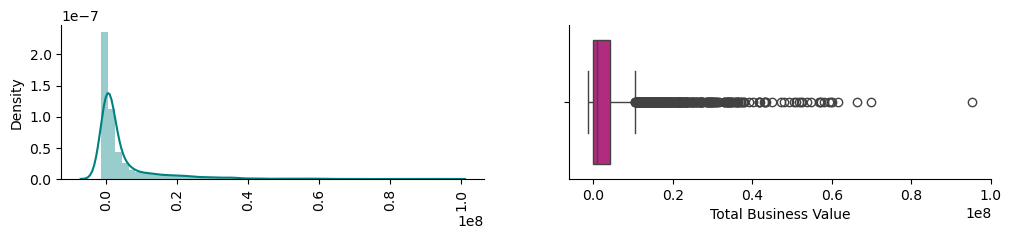

In [39]:
a =ola1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=ola1[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=ola1[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

## Bivariate and Multivariate

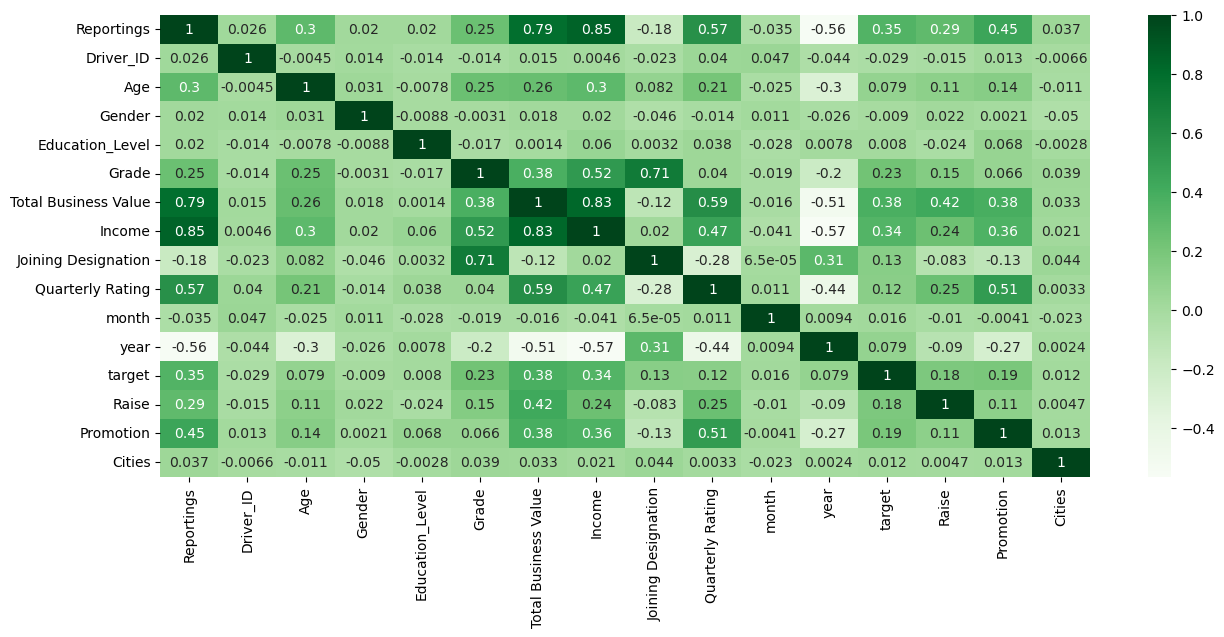

In [40]:
corr = ola1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1371175463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1371175463.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1371175463.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')


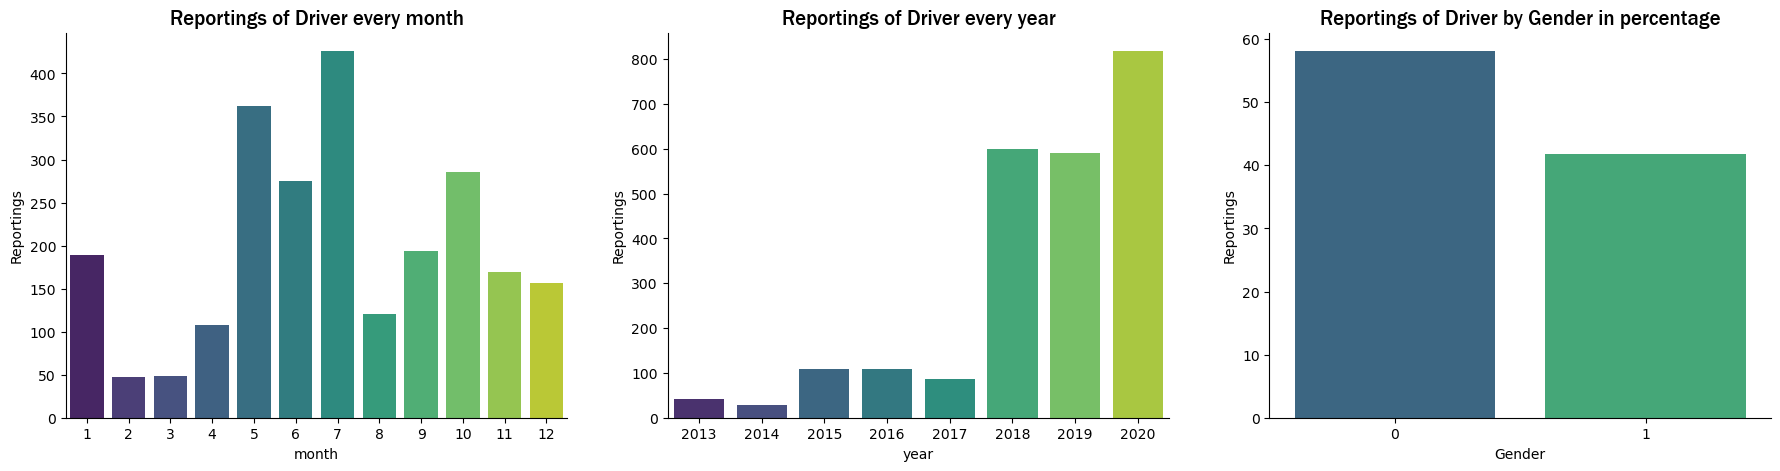

In [41]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,3,1)
grouped_months = ola1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
plt.title('Reportings of Driver every month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,2)
grouped_years = ola1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
plt.title('Reportings of Driver every year',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,3)
grouped_gender = ola1.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings'] =(grouped_gender['Reportings']/sum(ola1.Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')
plt.title('Reportings of Driver by Gender in percentage',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
sns.despine()
plt.show()

In [42]:
grouped_gender

,Gender,Reportings
0,0,58.12
1,1,41.88


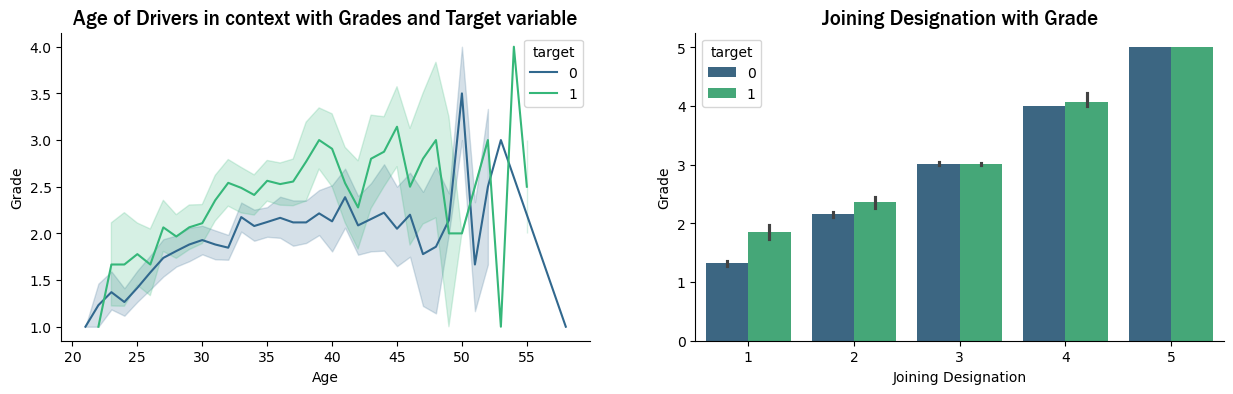

In [43]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=ola1.Age,y=ola1.Grade,hue=ola1.target,palette='viridis')
plt.title('Age of Drivers in context with Grades and Target variable',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=ola1, x="Joining Designation", y="Grade",palette='viridis',hue='target')
plt.title('Joining Designation with Grade',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\33476203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=ola1.Age,x=ola1['Joining Designation'],palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\33476203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=ola1.Grade,y=ola1.Income,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\33476203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=ola1.Education_Level,y=ola1.Income,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykerne

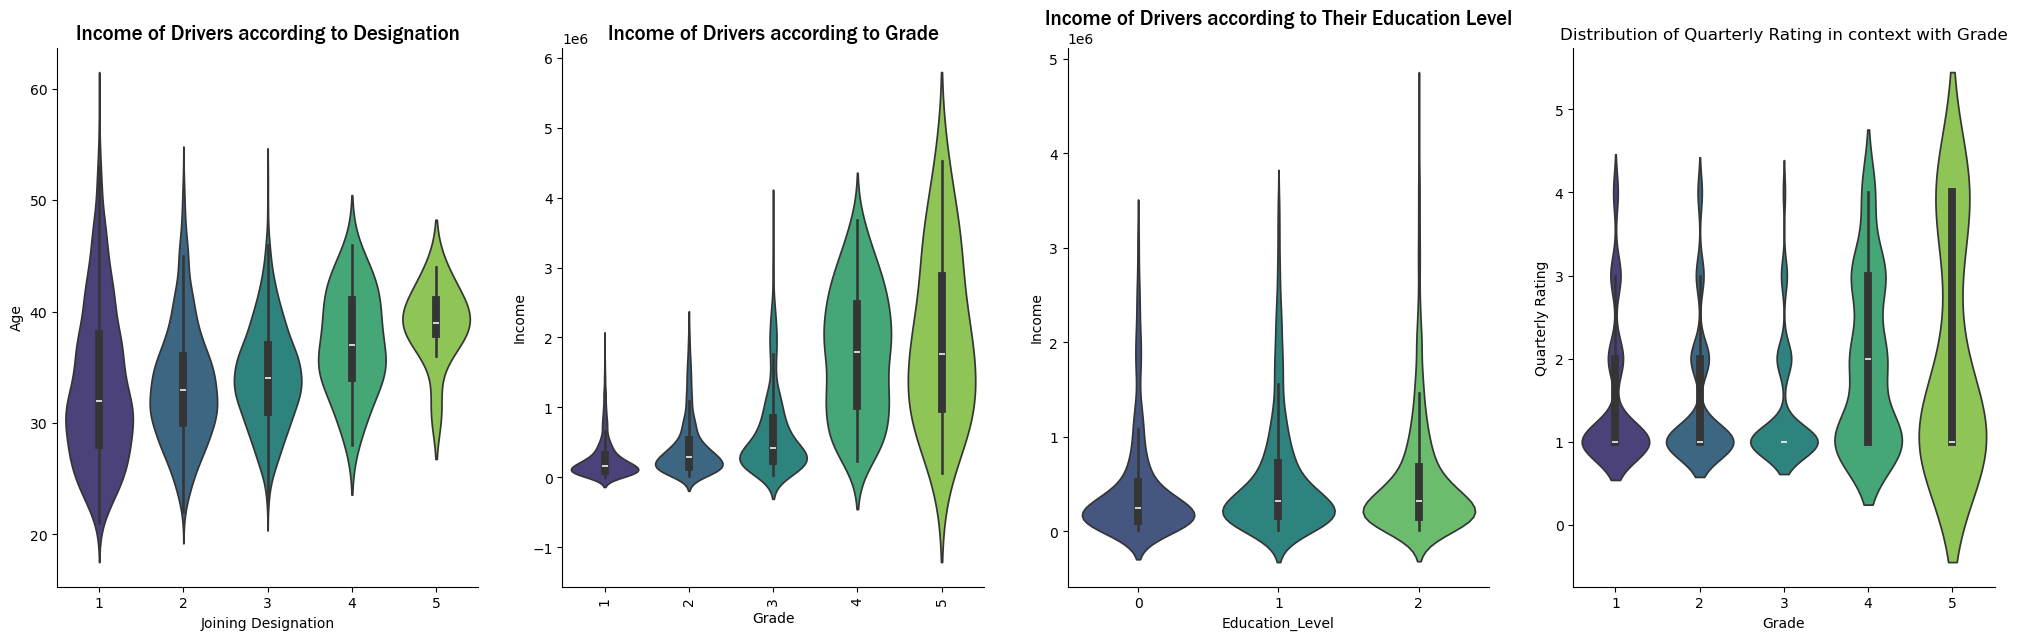

In [44]:
# figure7
plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
sns.violinplot(y=ola1.Age,x=ola1['Joining Designation'],palette='viridis')
plt.title('Income of Drivers according to Designation',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,4,2)
sns.violinplot(x=ola1.Grade,y=ola1.Income,palette='viridis')
plt.title('Income of Drivers according to Grade',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.violinplot(x=ola1.Education_Level,y=ola1.Income,palette='viridis')
plt.title('Income of Drivers according to Their Education Level',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,4,4)
sns.violinplot(x=ola1['Grade'],y=ola1["Quarterly Rating"],palette='viridis')
plt.title('Distribution of Quarterly Rating in context with Grade')
sns.despine()
sns.despine()
plt.show()

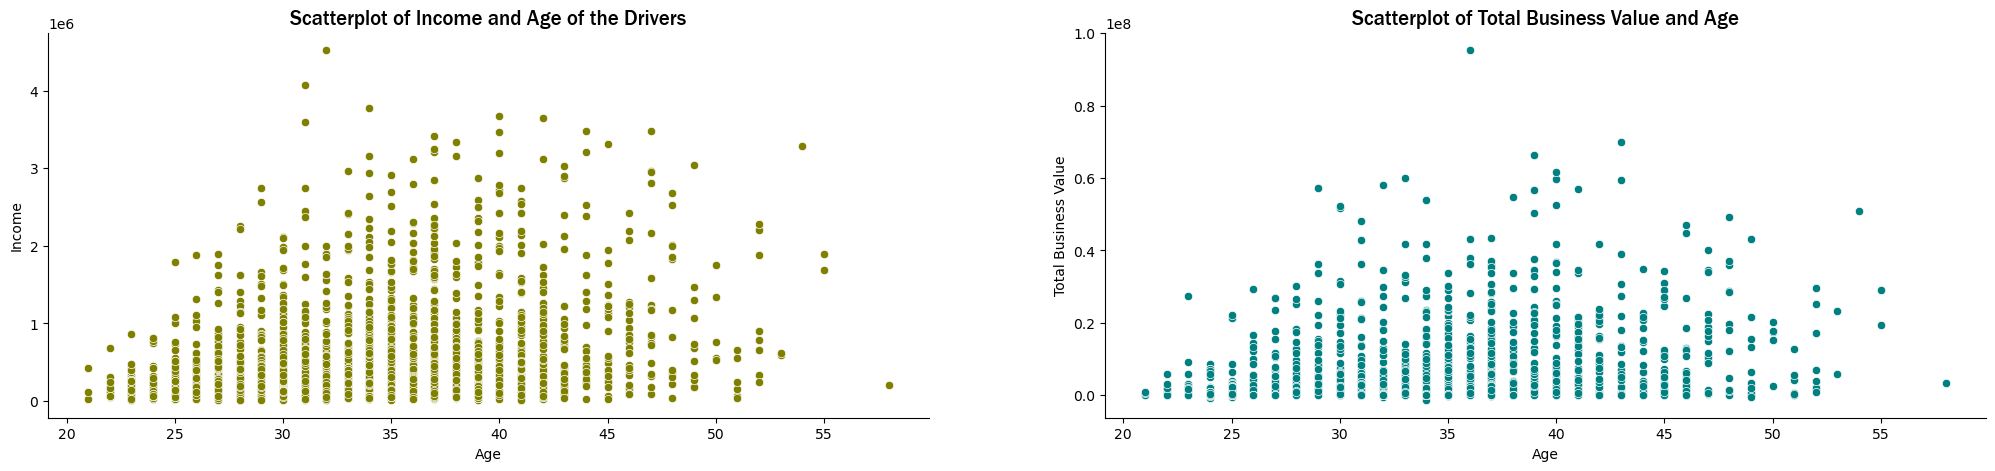

In [45]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=ola1.Age,y=ola1.Income,color='olive')
plt.title('Scatterplot of Income and Age of the Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x=ola1.Age,y=ola1['Total Business Value'],color='teal')
plt.title('Scatterplot of Total Business Value and Age',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

In [46]:
grouped_gender = ola1.groupby('Gender')['Income'].sum().reset_index()
grouped_education = ola1.groupby('Education_Level')['Income'].sum().reset_index()
grouped_grade = ola1.groupby('Grade')['Income'].sum().reset_index()
grouped_desig = ola1.groupby('Joining Designation')['Income'].sum().reset_index()
grouped_QR = ola1.groupby('Quarterly Rating')['Income'].sum().reset_index()
grouped_target = ola1.groupby('target')['Income'].sum().reset_index()
grouped_raise = ola1.groupby('Raise')['Income'].sum().reset_index()
grouped_promote = ola1.groupby('Promotion')['Income'].sum().reset_index()

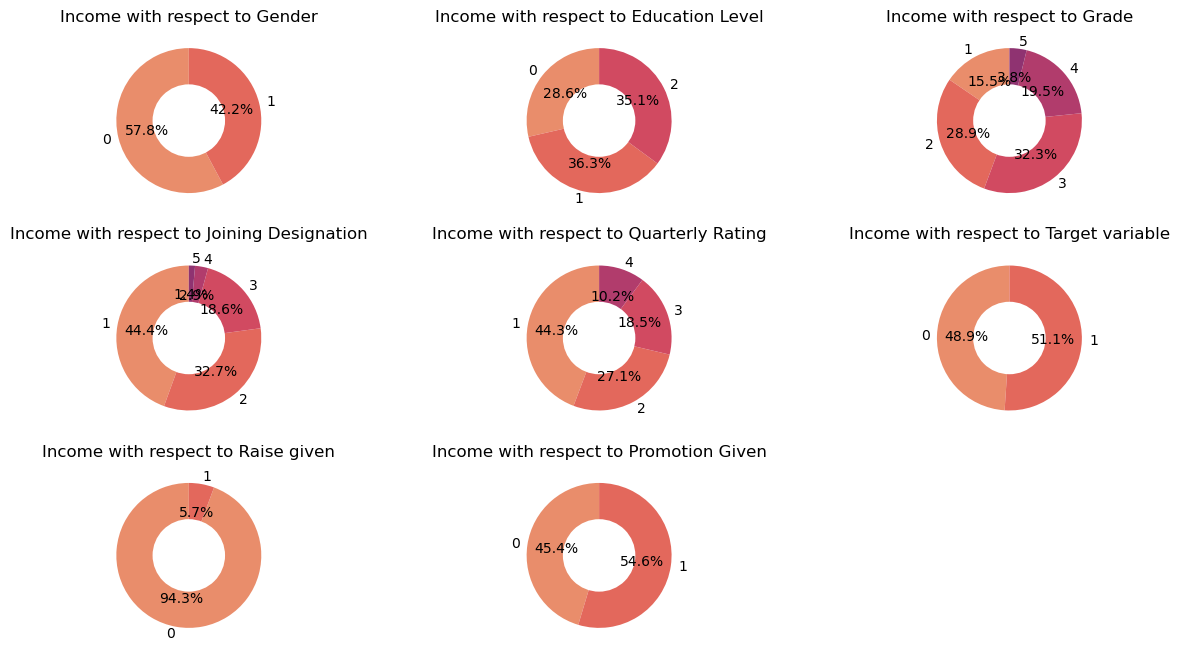

In [47]:

plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
plt.pie(grouped_gender['Income'], labels=grouped_gender['Gender'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Gender')
plt.subplot(3,3,2)
plt.pie(grouped_education['Income'], labels=grouped_education['Education_Level'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Education Level')
plt.subplot(3,3,3)
plt.pie(grouped_grade['Income'], labels=grouped_grade['Grade'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Grade')
plt.subplot(3,3,4)
plt.pie(grouped_desig['Income'], labels=grouped_desig['Joining Designation'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Joining Designation')
plt.subplot(3,3,5)
plt.pie(grouped_QR['Income'], labels=grouped_QR['Quarterly Rating'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Quarterly Rating')
plt.subplot(3,3,6)
plt.pie(grouped_target['Income'], labels=grouped_target['target'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Target variable')
plt.subplot(3,3,7)
plt.pie(grouped_raise['Income'], labels=grouped_raise['Raise'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Raise given')
plt.subplot(3,3,8)
plt.pie(grouped_promote['Income'], labels=grouped_promote['Promotion'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Promotion Given')
sns.despine()
plt.show()

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\1140172876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')


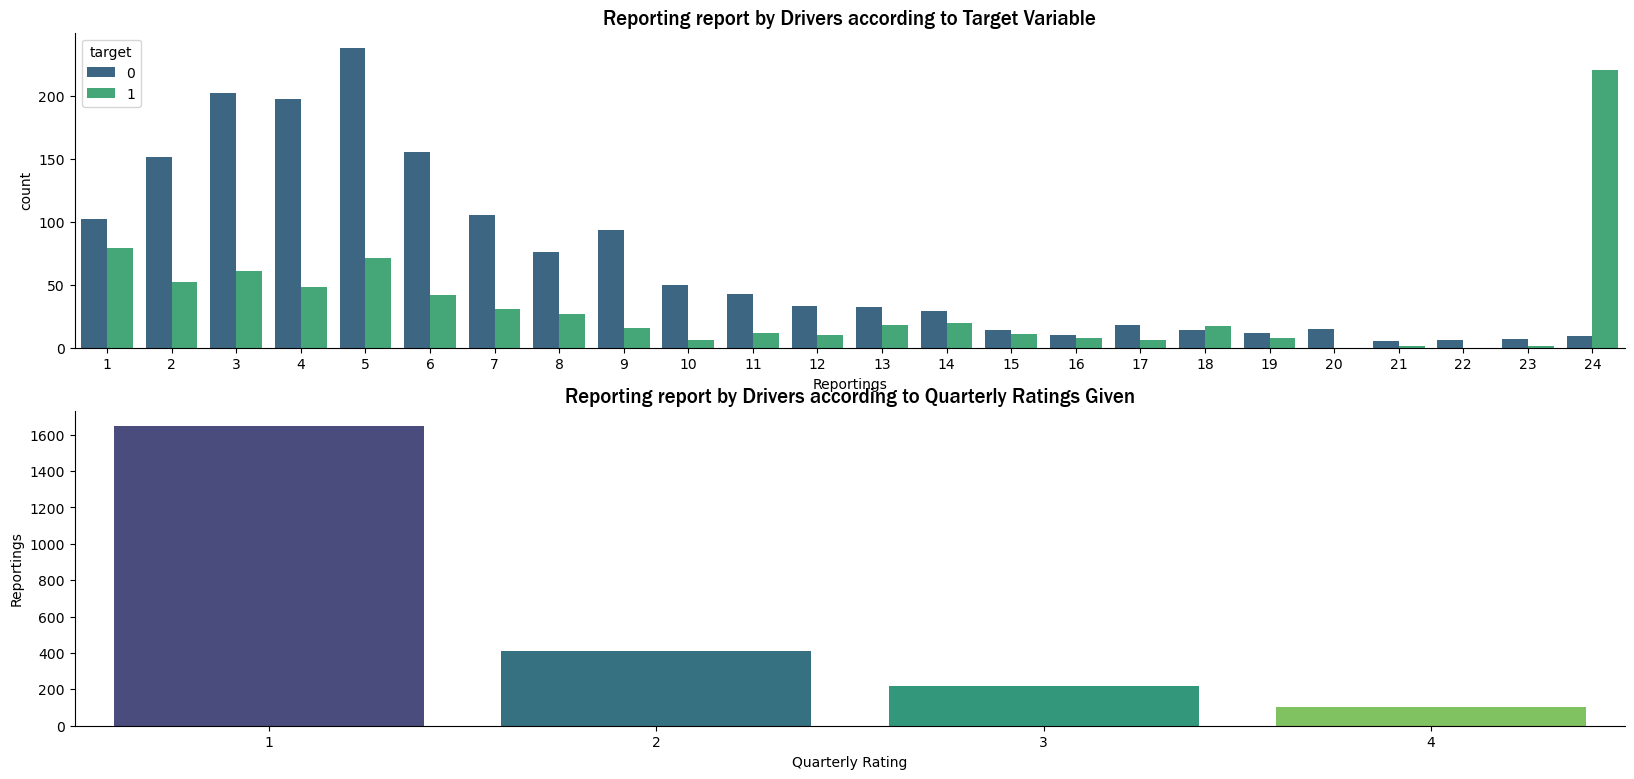

In [48]:
plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.countplot(x=ola1['Reportings'],hue=ola1.target,palette='viridis')
plt.title('Reporting report by Drivers according to Target Variable',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(2,1,2)
grouped_rating = ola1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

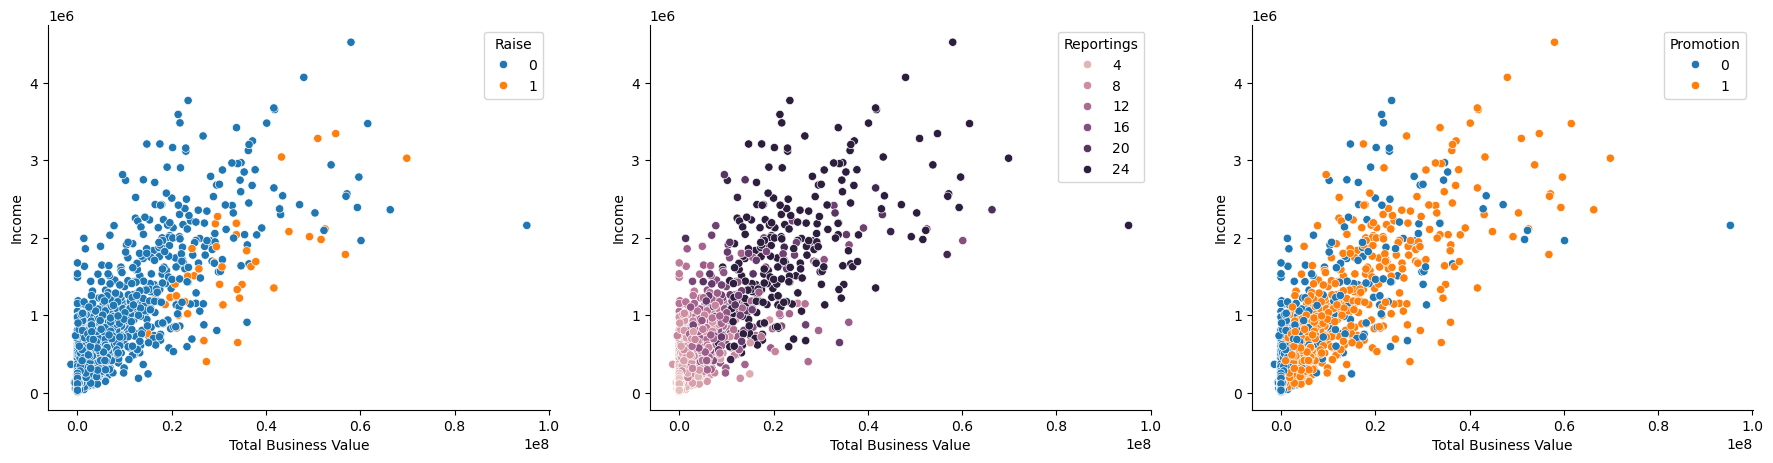

In [49]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=ola1['Total Business Value'],y=ola1.Income,hue=ola1.Promotion)
sns.despine()
plt.show()

    Observation:-
        1> So we see that there are 57% male employees and 43% female employees.
        2> The percentages of employees with different education levels are almost same for level 1 & 2.
        3> 97.3% of the employees who did not get a raise.
        4> Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
        5> Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
        6> Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
        7> Number of employees has been increase with increase in year as well as number of reportings.
        8> The majority of the employees seem to be associated with city C20.
        9> Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
        10> Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
        11> Income decreses with increase in Destination as about 4% of the employees hold higher designations.
        12> The median of the Income for employees having higher Grades is greater.
        13> Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
        14> Joining Designation Increases with increase in Grade.
        15> Max reporting days is 24 days.
        16> About 55% of the reportings of the employees has got Quarlerly Rating 1.
        17> Number of reportings increases with increase in Income as well as Total Business Value.

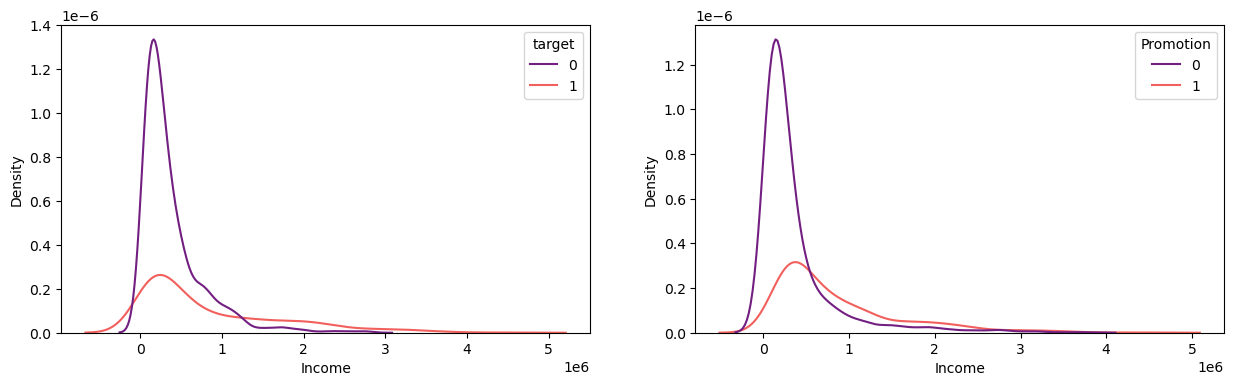

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=ola1.Income,hue=ola1['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=ola1.Income,hue=ola1['Promotion'],palette='magma')
plt.show()

## OUTLIER TREATMENT

In [51]:
ola1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [52]:
len(ola1[ola1['Total Business Value'] < 1])

729

As we can notice Total Business Value column has some values in negative.

We consider them as outlier which will affect the results of the our machine learning model.

Considering the parts of datasets that has Total Business Value > 1.

There are exactly 729 Driver having Total Business Value that less than 1.

In [53]:
ola1= ola1[ola1['Total Business Value'] > 1]

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3497343253.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='red')


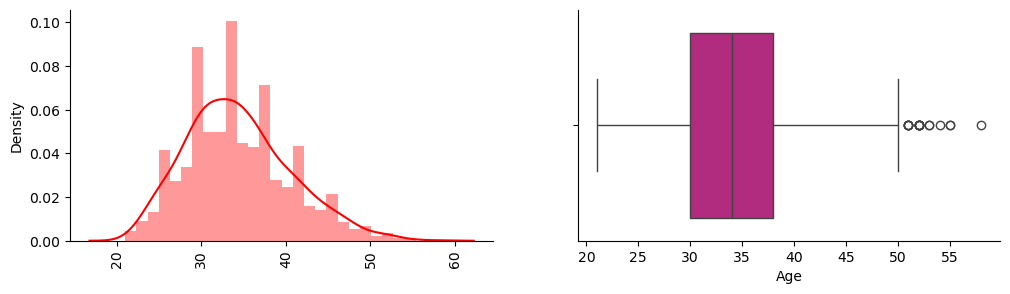

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3497343253.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='red')


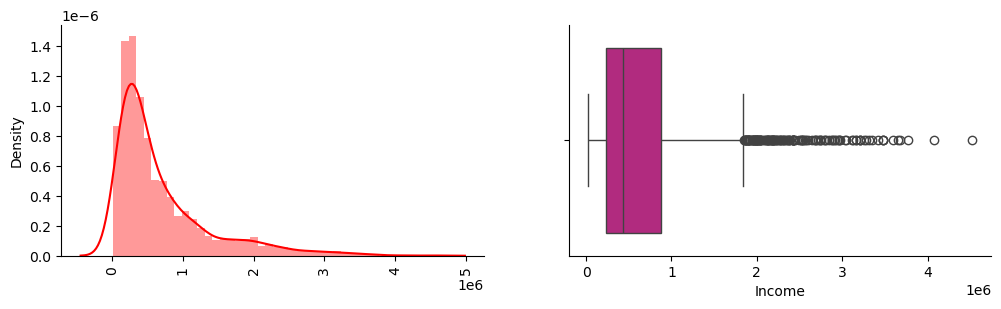

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3497343253.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ola1[i],color='red')


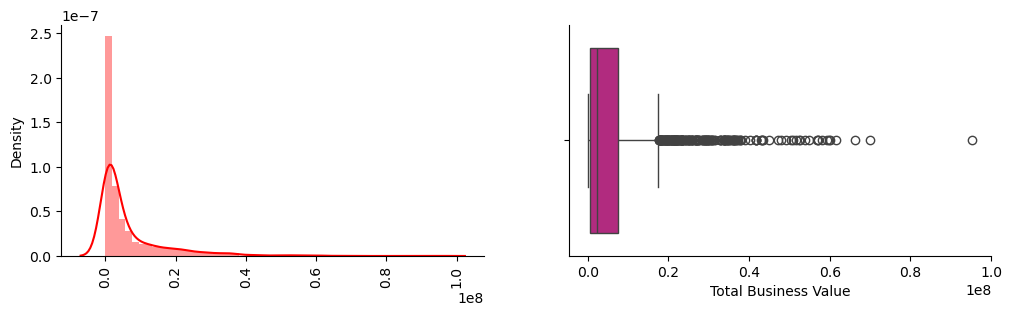

In [54]:
a =ola1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    sns.distplot(x=ola1[i],color='red')
    plt.xticks(rotation=90)
#     plt.figure(figsize=(9,5))
    plt.subplot(122)
    sns.boxplot(x=ola1[i],color='mediumvioletred')
    sns.despine()
    plt.show()

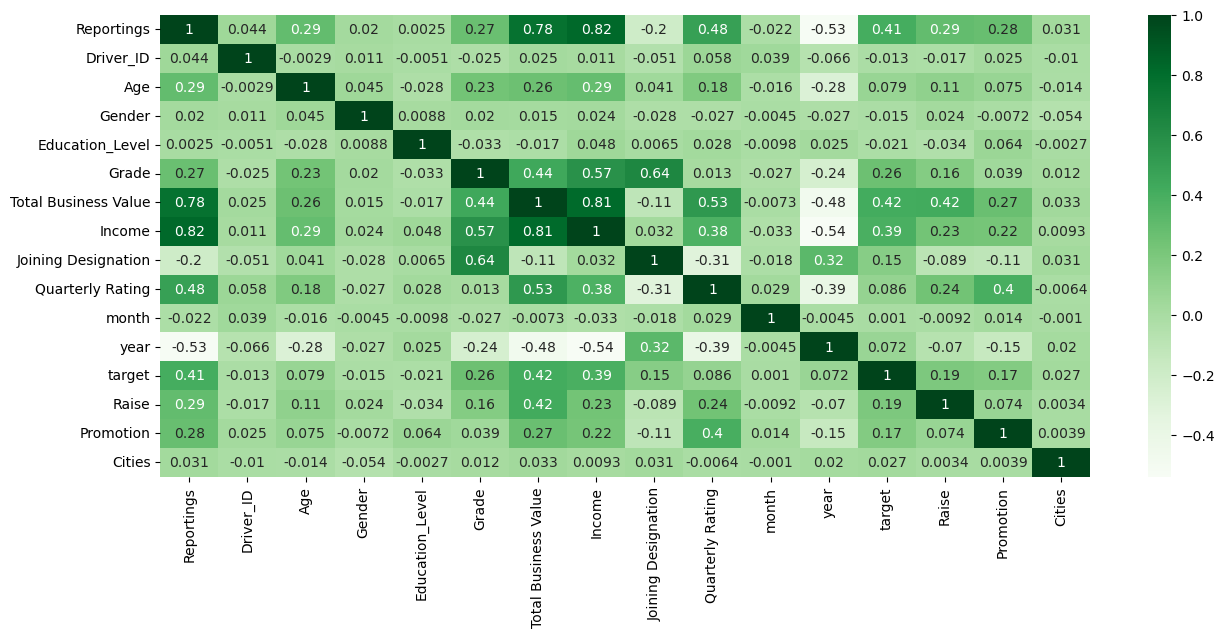

In [55]:
corr = ola1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

## ENSEMBLE LEARNING

### Data Preparation

The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -

If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave. • If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
X = ola1.drop('target',axis=1)
y = ola1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [58]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
#     32
    axes.grid()
    axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    )
    axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    )
    axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    plt.show()

In [93]:
X.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,23
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,0,1,11
7,6,12,35,0,2,1,2607180,168696,1,4,1,2019,0,1,23


In [61]:
ss= StandardScaler()
ss.fit_transform(X_train)

array([[-0.61446611, -1.09640018,  1.70794584, ..., -0.16737851,
         1.023749  , -0.04979913],
       [ 1.93718866, -1.32951199,  1.54780698, ..., -0.16737851,
        -0.97680193, -0.5247786 ],
       [-0.18919032, -1.0914666 ,  0.26669606, ..., -0.16737851,
         1.023749  ,  1.25639439],
       ...,
       [-0.75622471,  0.03585718, -1.49483144, ..., -0.16737851,
        -0.97680193, -0.88101319],
       [ 0.51960268,  1.32105562, -1.33469258, ..., -0.16737851,
         1.023749  , -1.59348238],
       [-0.33094892,  0.60815284, -0.69413712, ..., -0.16737851,
        -0.97680193, -0.28728886]])

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

c:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aeccs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: [0.72 0.76 0.75 0.75 0.78]
Mean: 0.7542506637370685
Decision Tree: [0.84  0.861 0.858 0.855 0.852]
Mean: 0.8529085416094478
RandomForestClassifier(): [0.89 0.91 0.88 0.87 0.9 ]
Mean: 0.8886093564039182
GradientBoostingClassifier: [0.888 0.915 0.882 0.879 0.848]
Mean: 0.8825432573468828
XGBoostClassifier: [0.72 0.76 0.75 0.75 0.78]
Mean: 0.879520278311819


## MACHINE LEARNING MODELS -

### WITHOUT THE TREATMENT OF CLASS IMBALANCE

### Random Forest Classifier 

In [63]:
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

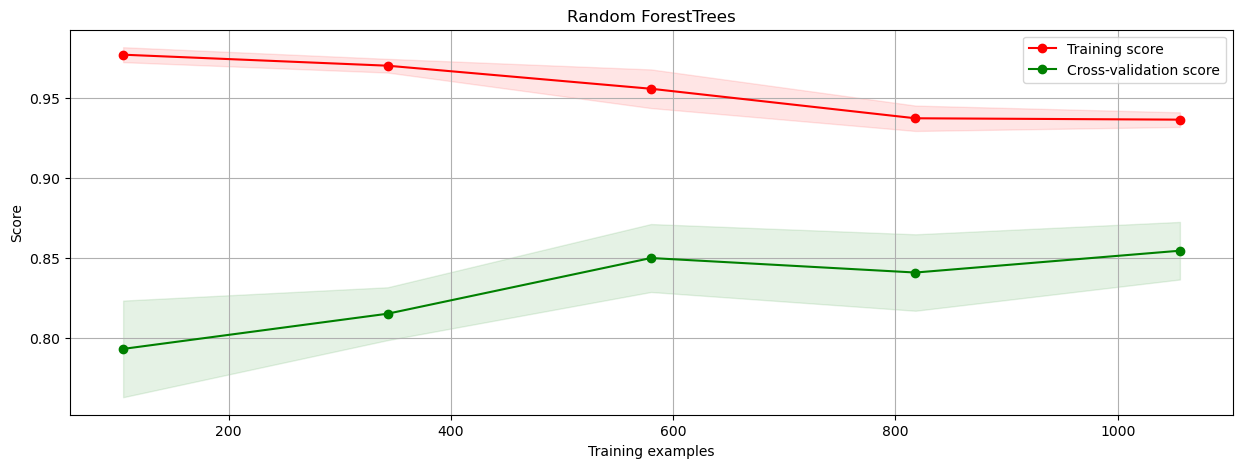

In [64]:
plot_learning_curve(rf_clf1, X_train, y_train, "Random ForestTrees")

In [65]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.9333838001514004
Test data accuracy: 0.8761329305135952
Accuracy of the model: 0.8761329305135952
ROC-AUC score test dataset:  0.9373344241857566
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       207
           1       0.87      0.78      0.83       124

    accuracy                           0.88       331
   macro avg       0.88      0.86      0.86       331
weighted avg       0.88      0.88      0.87       331

----------------------------------------------------------------------
Confusion Metrix
[[193  14]
 [ 27  97]]


In [66]:
rf_clf_imp1 = rf_clf1.feature_importances_

## XG Boosting Classifier

In [67]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]

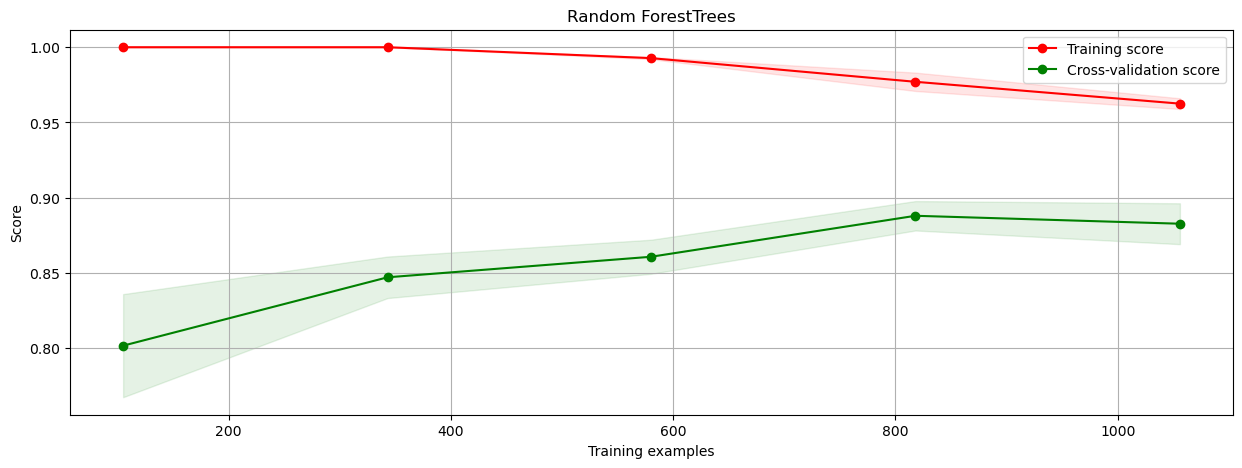

In [68]:
plot_learning_curve(gbc1, X_train, y_train, "Random ForestTrees")

In [69]:
gbc_clf_imp1 = gbc1.feature_importances_

In [70]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.9553368660105981
Test Score :  0.9003021148036254
Accuracy Score :  0.9003021148036254
ROC-AUC score test dataset:  0.9495091164095372
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       207
           1       0.89      0.84      0.86       124

    accuracy                           0.90       331
   macro avg       0.90      0.89      0.89       331
weighted avg       0.90      0.90      0.90       331

------------------------------------------------------------
Confusion Matrix
[[194  13]
 [ 20 104]]
------------------------------------------------------------


## CLASS IMBALANCE TREATMENT

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2807356427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train,palette='Set2')


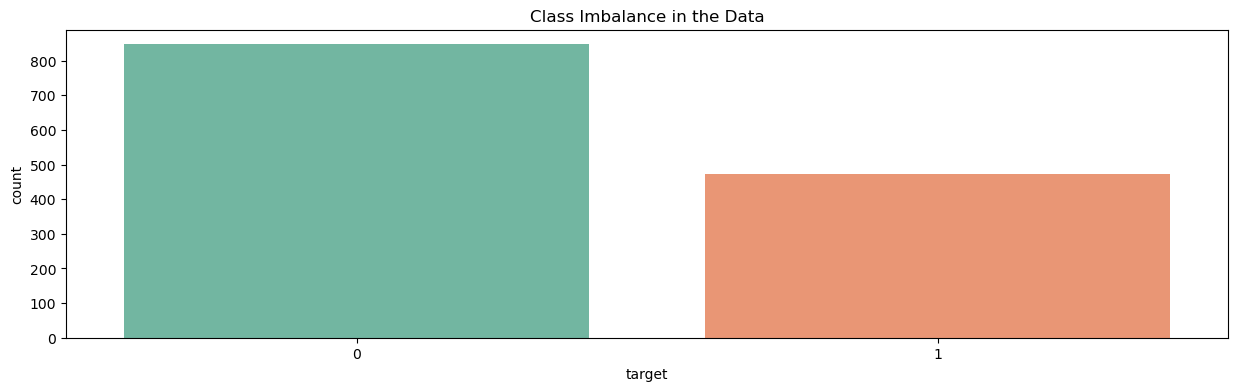

In [71]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [72]:
(y_train.value_counts()*100)/len(y_train)


target
0    64.118092
1    35.881908
Name: count, dtype: float64

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\2026475823.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())


In [75]:
X_train_smot.shape,y_train_smot.shape
X_test.shape,y_test.shape

((331, 15), (331,))

In [76]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({0: 847, 1: 847})


## Randome Forest Classifier

In [77]:
clf = RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='sqrt',n_estimators= 19)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

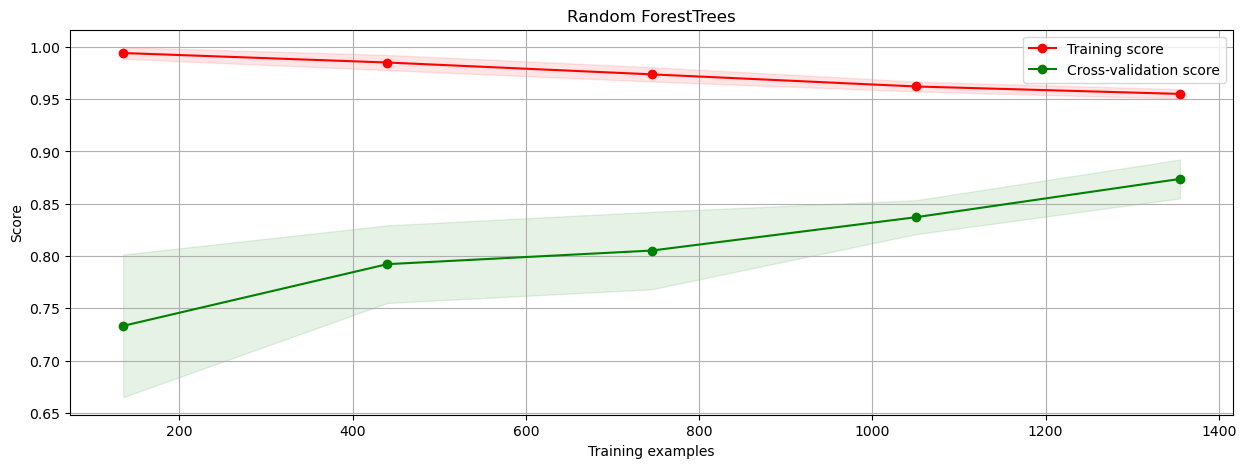

In [78]:
plot_learning_curve(clf, X_train_smot, y_train_smot, "Random ForestTrees")

In [79]:
y_pred = clf.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm3 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       207
           1       0.81      0.91      0.86       124

    accuracy                           0.89       331
   macro avg       0.87      0.89      0.88       331
weighted avg       0.89      0.89      0.89       331

----------------------------------------------------------------------
Confusion Metrix
[[180  27]
 [ 11 113]]


In [80]:
rf_clf_imp2= clf.feature_importances_

## Gradient Boosting


In [81]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
gbc_clf_imp2 = gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test, y_pred1))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       207
           1       0.83      0.90      0.86       124

    accuracy                           0.89       331
   macro avg       0.88      0.89      0.89       331
weighted avg       0.90      0.89      0.89       331

------------------------------------------------------------
Confusion Matrix
[[185  22]
 [ 13 111]]
------------------------------------------------------------


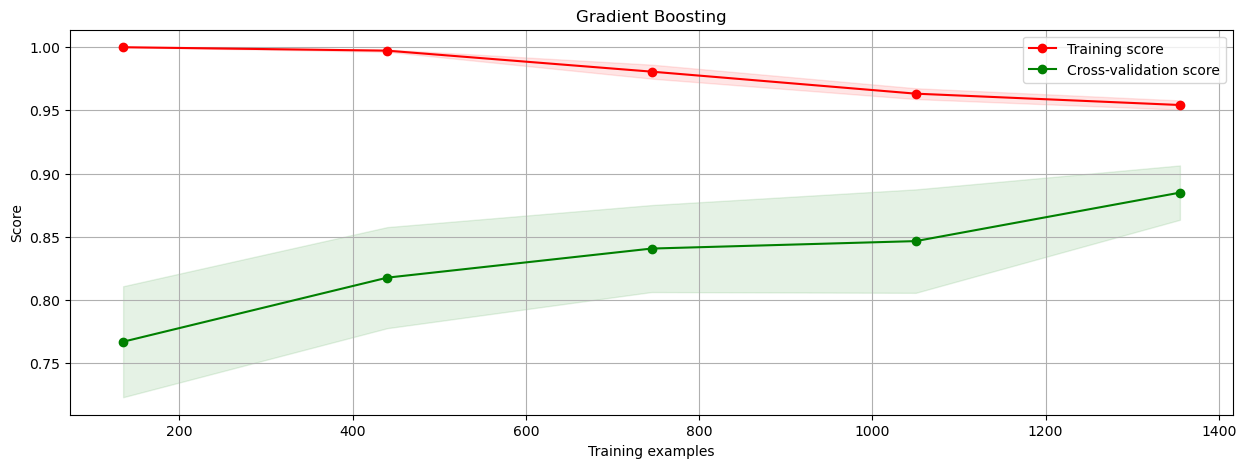

In [82]:
plot_learning_curve(gbc2, X_train_smot, y_train_smot, "Gradient Boosting")

In [83]:
data1 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})
data2 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})

In [84]:
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.273902,0.420886
1,Driver_ID,0.024316,0.011625
2,Age,0.024196,0.008003
3,Gender,0.005343,0.001978
4,Education_Level,0.007821,0.000936
5,Grade,0.013015,0.000585
6,Total Business Value,0.130371,0.124880
7,Income,0.114567,0.017756
8,Joining Designation,0.034520,0.006300
9,Quarterly Rating,0.058237,0.028193


In [85]:
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.168252,0.300460
1,Driver_ID,0.040842,0.009306
2,Age,0.040387,0.009589
3,Gender,0.013051,0.009140
4,Education_Level,0.017476,0.004790
5,Grade,0.029817,0.004796
6,Total Business Value,0.189197,0.205282
7,Income,0.116312,0.024849
8,Joining Designation,0.028563,0.003067
9,Quarterly Rating,0.043331,0.028597


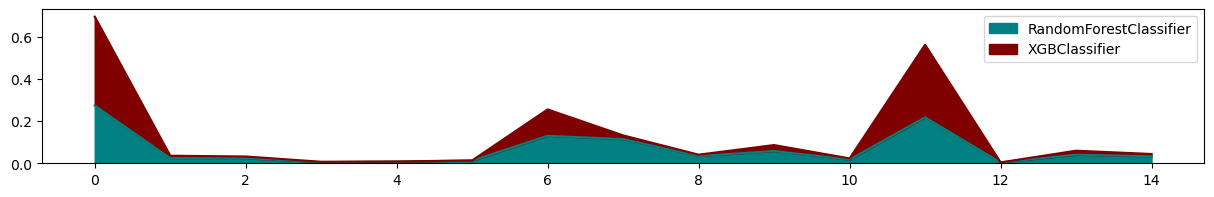

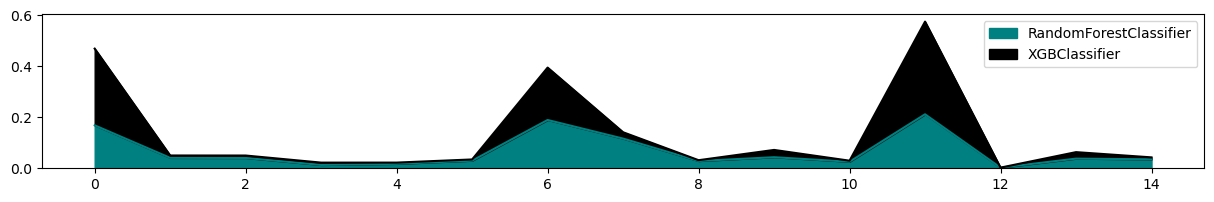

In [86]:
data1.plot(kind="area", figsize = (15,2),color=['teal','maroon'])

data2.plot(kind="area", figsize = (15,2),color=['teal','black'])

plt.show()

In [87]:
# calculating precision, reall and f1_score for every 
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [88]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [89]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,193,14,27,97,90.398126,93.236715,87.727273
1,GradientBoosting,imbalanced,194,13,20,104,92.161520,93.719807,90.654206
2,RandomForest,balanced,180,27,11,113,90.452261,86.956522,94.240838
3,GradientBoosting,balanced,185,22,13,111,91.358025,89.371981,93.434343


C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3590127600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3590127600.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3590127600.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
C:\Users\aeccs\AppData\Local\Temp\ipykernel_12352\3590127600.py:12: FutureWar

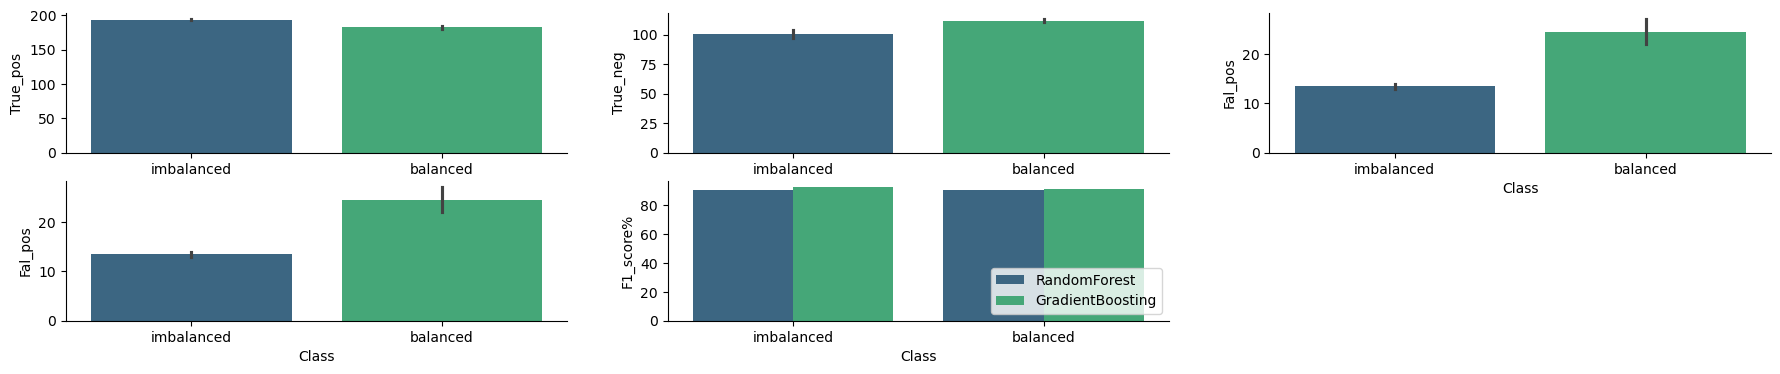

In [90]:
plt.figure(figsize=(22,4))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
# plt.show()
plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],palette='viridis',hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

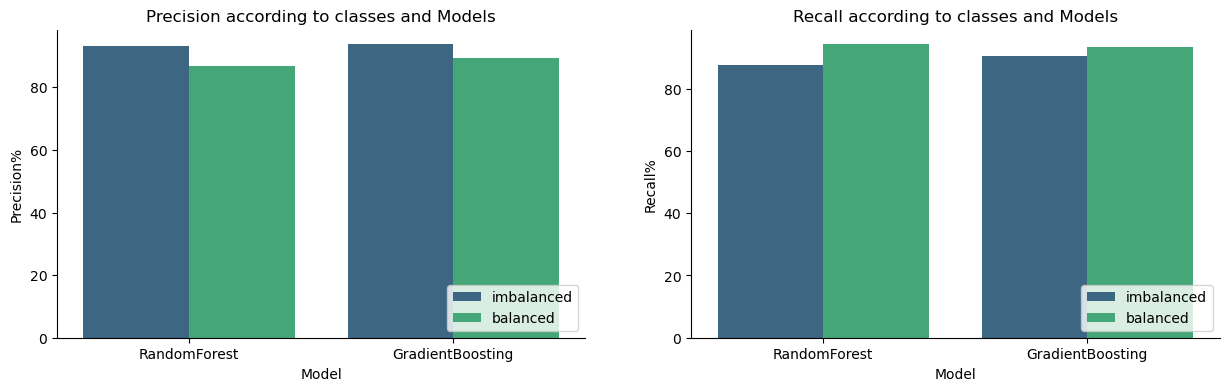

In [91]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class,palette='viridis')
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class,palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

    INSIGHTS
        So we see that there are 57% male employees and 43% female employees.
        The percentages of employees with different education levels are almost same for level 1 & 2.
        97.3% of the employees who did not get a raise.
        Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined  at higher levels.
        Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%).  Less than 5% of the employees are currently in higher designations.
        Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
        Number of employees has been increase with increase in year as well as number of reportings.
        The majority of the employees seem to be associated with city C20.
        Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
        Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
        Income decreses with increase in Destination as about 4% of the employees hold higher designations.
        The median of the Income for employees having higher Grades is greater.
        Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
        Joining Designation Increases with increase in Grade.
        Top reporting days is 24 days.
        About 55% of the reportings of the employees has got Quarlerly Rating 1.
        Number of reportings increases with increase in Income as well as Total Business Value.
        Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.
        Precision dropped after treatment of data imbalance and is performing better in Random Forest.
        F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.

In [92]:
import pickle 
pickle_out = open("ola_classifier.pkl", mode = "wb") 
pickle.dump(gbc1, pickle_out) 
pickle_out.close()